In [72]:
import anndata
import os

# Load the .h5ad file (replace with your filename)
input_file = os.path.join('data', 'cancer','breast.h5ad')
adata = anndata.read_h5ad(input_file)

# Basic info
print(adata)
print("Shape:", adata.shape)

# Show first few rows of observations and variables
print("Observations (obs):")
print(adata.obs.head())

print("Variables (var):")
print(adata.var.head())

# List available layers
print("Layers:", list(adata.layers.keys()))

# List obs and var columns
print("Obs columns:", adata.obs.columns.tolist())
print("Var columns:", adata.var.columns.tolist())

AnnData object with n_obs × n_vars = 4263 × 14906
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes', 'size_factors'
    var: 'feature_id', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'feature_name'
    uns: 'dataset_description', 'dataset_id', 'dataset_name', 'dataset_organism', 'dataset_reference', 'dataset_summary', 'dataset_url', 'normalization_id', 'spatial'
    obsm: 'spatial'
    layers: 'counts', 'normalized'
Shape: (4263, 14906)
Observations (obs):
                    in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAACGAATAGTTC-1          1          0         16                667   
AAACAAGTATCTCCCA-1          1         50        102         

In [73]:
# read  the uns layer

print("Unstructured data (uns):")
print(adata.uns['dataset_name'])


Unstructured data (uns):
10X Visium - Human Breast Cancer 1


In [74]:
# make normalized df
normalized = adata.layers['normalized']
# Convert to DataFrame for easier manipulation
import pandas as pd
normalized_df = pd.DataFrame(normalized.toarray(), index=adata.obs_names, columns=adata.var_names)
normalized_df.head()

gene_ids            ENSG00000238009  ENSG00000241860  ENSG00000237491  \
AAACAACGAATAGTTC-1              0.0              0.0         0.000000   
AAACAAGTATCTCCCA-1              0.0              0.0         0.000000   
AAACAATCTACTAGCA-1              0.0              0.0         0.000000   
AAACACCAATAACTGC-1              0.0              0.0         0.347061   
AAACAGAGCGACTCCT-1              0.0              0.0         0.000000   

gene_ids            ENSG00000228794  ENSG00000225880  ENSG00000230368  \
AAACAACGAATAGTTC-1         0.000000              0.0              0.0   
AAACAAGTATCTCCCA-1         0.000000              0.0              0.0   
AAACAATCTACTAGCA-1         0.000000              0.0              0.0   
AAACACCAATAACTGC-1         0.000000              0.0              0.0   
AAACAGAGCGACTCCT-1         0.439917              0.0              0.0   

gene_ids            ENSG00000223764  ENSG00000187634  ENSG00000188976  \
AAACAACGAATAGTTC-1         0.000000              0.0         2.501289   
AAACAAGTATCTCCCA-1         0.000000              0.0         0.835611   
AAACAATCTACTAGCA-1         0.000000              0.0         0.000000   
AAACACCAATAACTGC-1         0.000000              0.0         0.000000   
AAACAGAGCGACTCCT-1         0.439917              0.0         0.000000   

gene_ids            ENSG00000187961  ...  ENSG00000155959  ENSG00000155962  \
AAACAACGAATAGTTC-1         0.000000  ...         0.000000              0.0   
AAACAAGTATCTCCCA-1         0.000000  ...         0.626374              0.0   
AAACAATCTACTAGCA-1         0.000000  ...         0.000000              0.0   
AAACACCAATAACTGC-1         0.347061  ...         0.604210              0.0   
AAACAGAGCGACTCCT-1         0.000000  ...         0.744389              0.0   

gene_ids            ENSG00000185973  ENSG00000124333  ENSG00000277400  \
AAACAACGAATAGTTC-1         0.000000         0.000000          0.00000   
AAACAAGTATCTCCCA-1         0.361449         0.361449          0.00000   
AAACAATCTACTAGCA-1         0.000000         0.000000          0.00000   
AAACACCAATAACTGC-1         0.000000         0.000000          0.60421   
AAACAGAGCGACTCCT-1         0.439917         0.000000          0.00000   

gene_ids            ENSG00000274847  ENSG00000276256  ENSG00000273748  \
AAACAACGAATAGTTC-1              0.0              0.0              0.0   
AAACAAGTATCTCCCA-1              0.0              0.0              0.0   
AAACAATCTACTAGCA-1              0.0              0.0              0.0   
AAACACCAATAACTGC-1              0.0              0.0              0.0   
AAACAGAGCGACTCCT-1              0.0              0.0              0.0   

gene_ids            ENSG00000278817  ENSG00000277196  
AAACAACGAATAGTTC-1         0.000000              0.0  
AAACAAGTATCTCCCA-1         0.000000              0.0  
AAACAATCTACTAGCA-1         0.000000              0.0  
AAACACCAATAACTGC-1         0.347061              0.0  
AAACAGAGCGACTCCT-1         0.000000              0.0  

[5 rows x 14906 columns]

In [75]:
# sum of first 10 rows
print("Sum of first 10 rows in normalized data:")
print(normalized_df.head(10).sum(axis=1))

# sum of first 10 columns
print("Sum of first 10 columns in normalized data:")
print(normalized_df.iloc[:, :10].sum(axis=0))

Sum of first 10 rows in normalized data:
AAACAACGAATAGTTC-1    1743.878174
AAACAAGTATCTCCCA-1    4354.510742
AAACAATCTACTAGCA-1     748.544861
AAACACCAATAACTGC-1    4359.351562
AAACAGAGCGACTCCT-1    4346.265625
AAACAGCTTTCAGAAG-1    3724.986328
AAACAGGGTCTATATT-1    3433.738770
AAACATGGTGAGAGGA-1    3948.497070
AAACATTTCCCGGATT-1    4496.757324
AAACCACTACACAGAT-1    4242.033691
dtype: float32
Sum of first 10 columns in normalized data:
gene_ids
ENSG00000238009      29.302086
ENSG00000241860      48.840393
ENSG00000237491     348.119446
ENSG00000228794     327.400330
ENSG00000225880      33.491711
ENSG00000230368     117.240364
ENSG00000223764     131.537125
ENSG00000187634     292.051086
ENSG00000188976    1442.560913
ENSG00000187961     388.343719
dtype: float32


In [76]:
# show counts layer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


counts = adata.layers['counts']

# Convert counts to a DataFrame for easier manipulation
counts_df = pd.DataFrame(counts.toarray(), index=adata.obs_names, columns=adata.var_names)
# Display the first few rows of the counts DataFrame
print("Counts DataFrame:")
counts_df.head()

Counts DataFrame:


gene_ids            ENSG00000238009  ENSG00000241860  ENSG00000237491  \
AAACAACGAATAGTTC-1              0.0              0.0              0.0   
AAACAAGTATCTCCCA-1              0.0              0.0              0.0   
AAACAATCTACTAGCA-1              0.0              0.0              0.0   
AAACACCAATAACTGC-1              0.0              0.0              1.0   
AAACAGAGCGACTCCT-1              0.0              0.0              0.0   

gene_ids            ENSG00000228794  ENSG00000225880  ENSG00000230368  \
AAACAACGAATAGTTC-1              0.0              0.0              0.0   
AAACAAGTATCTCCCA-1              0.0              0.0              0.0   
AAACAATCTACTAGCA-1              0.0              0.0              0.0   
AAACACCAATAACTGC-1              0.0              0.0              0.0   
AAACAGAGCGACTCCT-1              1.0              0.0              0.0   

gene_ids            ENSG00000223764  ENSG00000187634  ENSG00000188976  \
AAACAACGAATAGTTC-1              0.0              0.0              1.0   
AAACAAGTATCTCCCA-1              0.0              0.0              3.0   
AAACAATCTACTAGCA-1              0.0              0.0              0.0   
AAACACCAATAACTGC-1              0.0              0.0              0.0   
AAACAGAGCGACTCCT-1              1.0              0.0              0.0   

gene_ids            ENSG00000187961  ...  ENSG00000155959  ENSG00000155962  \
AAACAACGAATAGTTC-1              0.0  ...              0.0              0.0   
AAACAAGTATCTCCCA-1              0.0  ...              2.0              0.0   
AAACAATCTACTAGCA-1              0.0  ...              0.0              0.0   
AAACACCAATAACTGC-1              1.0  ...              2.0              0.0   
AAACAGAGCGACTCCT-1              0.0  ...              2.0              0.0   

gene_ids            ENSG00000185973  ENSG00000124333  ENSG00000277400  \
AAACAACGAATAGTTC-1              0.0              0.0              0.0   
AAACAAGTATCTCCCA-1              1.0              1.0              0.0   
AAACAATCTACTAGCA-1              0.0              0.0              0.0   
AAACACCAATAACTGC-1              0.0              0.0              2.0   
AAACAGAGCGACTCCT-1              1.0              0.0              0.0   

gene_ids            ENSG00000274847  ENSG00000276256  ENSG00000273748  \
AAACAACGAATAGTTC-1              0.0              0.0              0.0   
AAACAAGTATCTCCCA-1              0.0              0.0              0.0   
AAACAATCTACTAGCA-1              0.0              0.0              0.0   
AAACACCAATAACTGC-1              0.0              0.0              0.0   
AAACAGAGCGACTCCT-1              0.0              0.0              0.0   

gene_ids            ENSG00000278817  ENSG00000277196  
AAACAACGAATAGTTC-1              0.0              0.0  
AAACAAGTATCTCCCA-1              0.0              0.0  
AAACAATCTACTAGCA-1              0.0              0.0  
AAACACCAATAACTGC-1              1.0              0.0  
AAACAGAGCGACTCCT-1              0.0              0.0  

[5 rows x 14906 columns]

In [77]:
counts_df.columns

Index(['ENSG00000238009', 'ENSG00000241860', 'ENSG00000237491',
       'ENSG00000228794', 'ENSG00000225880', 'ENSG00000230368',
       'ENSG00000223764', 'ENSG00000187634', 'ENSG00000188976',
       'ENSG00000187961',
       ...
       'ENSG00000155959', 'ENSG00000155962', 'ENSG00000185973',
       'ENSG00000124333', 'ENSG00000277400', 'ENSG00000274847',
       'ENSG00000276256', 'ENSG00000273748', 'ENSG00000278817',
       'ENSG00000277196'],
      dtype='object', name='gene_ids', length=14906)

In [78]:
# convert observations to a DataFrame
obs_df = adata.obs.copy()

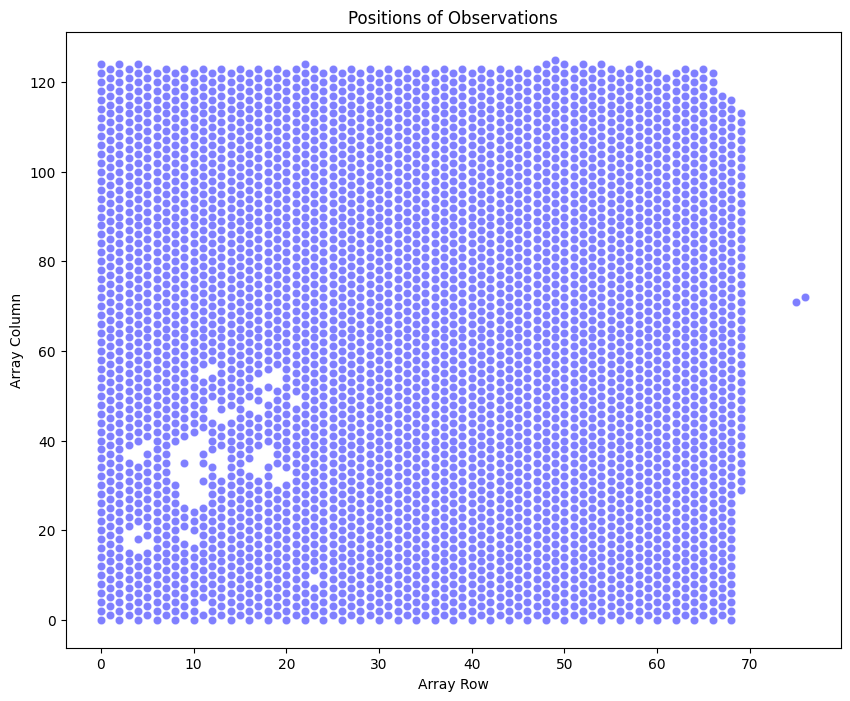

In [79]:
# plot positions of the experssions in observations using array_row and array_col in obs_df
plt.figure(figsize=(10, 8))
sns.scatterplot(data=obs_df, x='array_row', y='array_col', color='blue', alpha=0.5)
plt.title('Positions of Observations')
plt.xlabel('Array Row')
plt.ylabel('Array Column')
plt.show()


In [80]:
#Join the counts_df with obs_df
joined_df = obs_df.join(counts_df, how='inner')
# Display the first few rows of the joined DataFrame
print("Joined DataFrame:")
joined_df.head()

Joined DataFrame:


in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAACGAATAGTTC-1          1          0         16                667   
AAACAAGTATCTCCCA-1          1         50        102               6208   
AAACAATCTACTAGCA-1          1          3         43                195   
AAACACCAATAACTGC-1          1         59         19               6515   
AAACAGAGCGACTCCT-1          1         14         94               5694   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAACGAATAGTTC-1                 6.504288         927.0            6.833032   
AAACAAGTATCTCCCA-1                 8.733755       23939.0           10.083306   
AAACAATCTACTAGCA-1                 5.278115         215.0            5.375278   
AAACACCAATAACTGC-1                 8.782016       24957.0           10.124949   
AAACAGAGCGACTCCT-1                 8.647344       18378.0            9.818964   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAACGAATAGTTC-1                   26.860841                    37.756203   
AAACAAGTATCTCCCA-1                   22.724425                    30.302018   
AAACAATCTACTAGCA-1                   32.558140                    55.813953   
AAACACCAATAACTGC-1                   23.684738                    31.045398   
AAACAGAGCGACTCCT-1                   21.585591                    28.610295   

                    pct_counts_in_top_200_genes  ...  ENSG00000155959  \
AAACAACGAATAGTTC-1                    49.622438  ...              0.0   
AAACAAGTATCTCCCA-1                    39.103555  ...              2.0   
AAACAATCTACTAGCA-1                   100.000000  ...              0.0   
AAACACCAATAACTGC-1                    39.692271  ...              2.0   
AAACAGAGCGACTCCT-1                    37.109588  ...              2.0   

                    ENSG00000155962  ENSG00000185973  ENSG00000124333  \
AAACAACGAATAGTTC-1              0.0              0.0              0.0   
AAACAAGTATCTCCCA-1              0.0              1.0              1.0   
AAACAATCTACTAGCA-1              0.0              0.0              0.0   
AAACACCAATAACTGC-1              0.0              0.0              0.0   
AAACAGAGCGACTCCT-1              0.0              1.0              0.0   

                    ENSG00000277400  ENSG00000274847  ENSG00000276256  \
AAACAACGAATAGTTC-1              0.0              0.0              0.0   
AAACAAGTATCTCCCA-1              0.0              0.0              0.0   
AAACAATCTACTAGCA-1              0.0              0.0              0.0   
AAACACCAATAACTGC-1              2.0              0.0              0.0   
AAACAGAGCGACTCCT-1              0.0              0.0              0.0   

                    ENSG00000273748  ENSG00000278817  ENSG00000277196  
AAACAACGAATAGTTC-1              0.0              0.0              0.0  
AAACAAGTATCTCCCA-1              0.0              0.0              0.0  
AAACAATCTACTAGCA-1              0.0              0.0              0.0  
AAACACCAATAACTGC-1              0.0              1.0              0.0  
AAACAGAGCGACTCCT-1              0.0              0.0              0.0  

[5 rows x 14919 columns]

In [81]:
# create data frame from the counts_df where the value is the column name of the highest value in teh row
max_counts_df = counts_df.idxmax(axis=1)
# Display the first few rows of the max_counts DataFrame
print("Max Counts DataFrame:")
type(max_counts_df)
#convert to a DataFrame
max_counts_df = pd.DataFrame(max_counts_df, columns=['max_gene'])
max_counts_df.head()

Max Counts DataFrame:


max_gene
AAACAACGAATAGTTC-1  ENSG00000110484
AAACAAGTATCTCCCA-1  ENSG00000110484
AAACAATCTACTAGCA-1  ENSG00000124935
AAACACCAATAACTGC-1  ENSG00000110484
AAACAGAGCGACTCCT-1  ENSG00000110484

In [82]:
#join the max_counts_df with obs_df
joined_max_counts_df = obs_df.join(max_counts_df, how='inner')
# Display the first few rows of the joined DataFrame
print("Joined Max Counts DataFrame:")
joined_max_counts_df.head()

Joined Max Counts DataFrame:


in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAACGAATAGTTC-1          1          0         16                667   
AAACAAGTATCTCCCA-1          1         50        102               6208   
AAACAATCTACTAGCA-1          1          3         43                195   
AAACACCAATAACTGC-1          1         59         19               6515   
AAACAGAGCGACTCCT-1          1         14         94               5694   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAACGAATAGTTC-1                 6.504288         927.0            6.833032   
AAACAAGTATCTCCCA-1                 8.733755       23939.0           10.083306   
AAACAATCTACTAGCA-1                 5.278115         215.0            5.375278   
AAACACCAATAACTGC-1                 8.782016       24957.0           10.124949   
AAACAGAGCGACTCCT-1                 8.647344       18378.0            9.818964   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAACGAATAGTTC-1                   26.860841                    37.756203   
AAACAAGTATCTCCCA-1                   22.724425                    30.302018   
AAACAATCTACTAGCA-1                   32.558140                    55.813953   
AAACACCAATAACTGC-1                   23.684738                    31.045398   
AAACAGAGCGACTCCT-1                   21.585591                    28.610295   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACAACGAATAGTTC-1                    49.622438                    81.984898   
AAACAAGTATCTCCCA-1                    39.103555                    51.748193   
AAACAATCTACTAGCA-1                   100.000000                   100.000000   
AAACACCAATAACTGC-1                    39.692271                    52.117642   
AAACAGAGCGACTCCT-1                    37.109588                    49.629992   

                    n_genes  size_factors         max_gene  
AAACAACGAATAGTTC-1      667         893.0  ENSG00000110484  
AAACAAGTATCTCCCA-1     6208       22967.0  ENSG00000110484  
AAACAATCTACTAGCA-1      195         208.0  ENSG00000124935  
AAACACCAATAACTGC-1     6515       24102.0  ENSG00000110484  
AAACAGAGCGACTCCT-1     5694       18097.0  ENSG00000110484

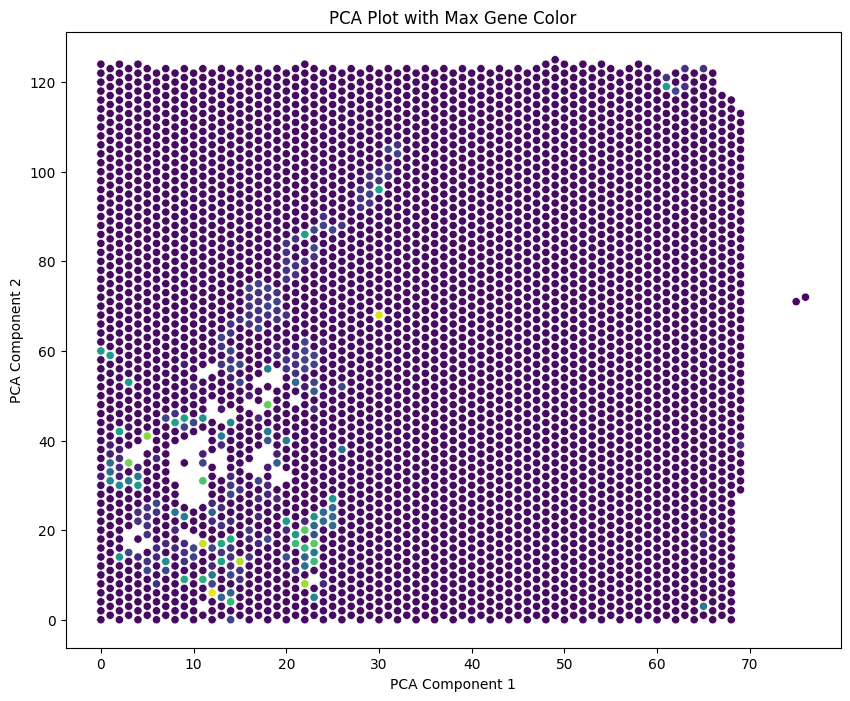

In [83]:
# plot chart with x as array_row, y as array_col and color as max_gene
plt.figure(figsize=(10, 8))
sns.scatterplot(data=joined_max_counts_df, x='array_row', y='array_col', hue='max_gene', palette='viridis', legend=None)
plt.title('PCA Plot with Max Gene Color')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

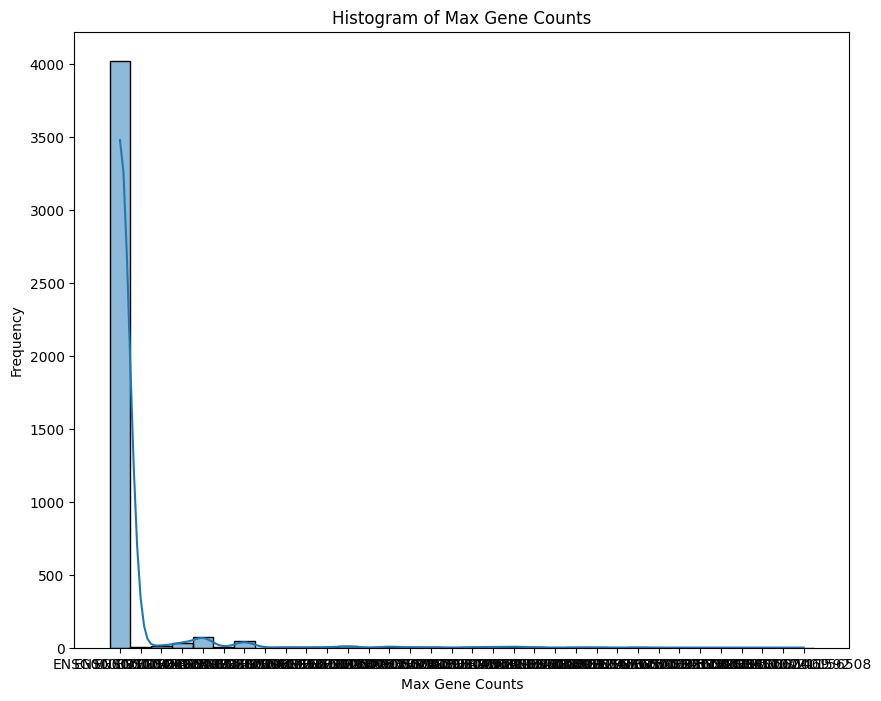

In [84]:
# histogram of the max gene counts
plt.figure(figsize=(10, 8))
sns.histplot(data=joined_max_counts_df, x='max_gene', bins=30, kde=True)
plt.title('Histogram of Max Gene Counts')
plt.xlabel('Max Gene Counts')
plt.ylabel('Frequency')
plt.show()


In [85]:
# find the top 10 genes with the highest counts
top_genes = counts_df.sum(axis=0).nlargest(10)
# Display the top 10 genes
print("Top 10 Genes with Highest Counts:")
print(top_genes)

Top 10 Genes with Highest Counts:
gene_ids
ENSG00000110484    2850413.0
ENSG00000124935     894451.0
ENSG00000229117     391725.0
ENSG00000185499     385012.0
ENSG00000137818     347833.0
ENSG00000167996     323074.0
ENSG00000160180     277451.0
ENSG00000177954     250865.0
ENSG00000160182     248415.0
ENSG00000156508     247884.0
dtype: float32


In [86]:
# find the names of the top 10 genes
top_genes_names = top_genes.index.tolist()
# Display the names of the top 10 genes
print("Top 10 Genes Names:")
print(top_genes_names)

Top 10 Genes Names:
['ENSG00000110484', 'ENSG00000124935', 'ENSG00000229117', 'ENSG00000185499', 'ENSG00000137818', 'ENSG00000167996', 'ENSG00000160180', 'ENSG00000177954', 'ENSG00000160182', 'ENSG00000156508']


In [87]:
# make a big df of all the data
all_data_df = joined_df.copy()

# drop columns n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,n_genes,size_factors
all_data_df.drop(columns=['n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
                        'log1p_total_counts', 'pct_counts_in_top_50_genes',
                        'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
                        'pct_counts_in_top_500_genes', 'n_genes', 'size_factors'], inplace=True)

all_data_df.head()

in_tissue  array_row  array_col  ENSG00000238009  \
AAACAACGAATAGTTC-1          1          0         16              0.0   
AAACAAGTATCTCCCA-1          1         50        102              0.0   
AAACAATCTACTAGCA-1          1          3         43              0.0   
AAACACCAATAACTGC-1          1         59         19              0.0   
AAACAGAGCGACTCCT-1          1         14         94              0.0   

                    ENSG00000241860  ENSG00000237491  ENSG00000228794  \
AAACAACGAATAGTTC-1              0.0              0.0              0.0   
AAACAAGTATCTCCCA-1              0.0              0.0              0.0   
AAACAATCTACTAGCA-1              0.0              0.0              0.0   
AAACACCAATAACTGC-1              0.0              1.0              0.0   
AAACAGAGCGACTCCT-1              0.0              0.0              1.0   

                    ENSG00000225880  ENSG00000230368  ENSG00000223764  ...  \
AAACAACGAATAGTTC-1              0.0              0.0              0.0  ...   
AAACAAGTATCTCCCA-1              0.0              0.0              0.0  ...   
AAACAATCTACTAGCA-1              0.0              0.0              0.0  ...   
AAACACCAATAACTGC-1              0.0              0.0              0.0  ...   
AAACAGAGCGACTCCT-1              0.0              0.0              1.0  ...   

                    ENSG00000155959  ENSG00000155962  ENSG00000185973  \
AAACAACGAATAGTTC-1              0.0              0.0              0.0   
AAACAAGTATCTCCCA-1              2.0              0.0              1.0   
AAACAATCTACTAGCA-1              0.0              0.0              0.0   
AAACACCAATAACTGC-1              2.0              0.0              0.0   
AAACAGAGCGACTCCT-1              2.0              0.0              1.0   

                    ENSG00000124333  ENSG00000277400  ENSG00000274847  \
AAACAACGAATAGTTC-1              0.0              0.0              0.0   
AAACAAGTATCTCCCA-1              1.0              0.0              0.0   
AAACAATCTACTAGCA-1              0.0              0.0              0.0   
AAACACCAATAACTGC-1              0.0              2.0              0.0   
AAACAGAGCGACTCCT-1              0.0              0.0              0.0   

                    ENSG00000276256  ENSG00000273748  ENSG00000278817  \
AAACAACGAATAGTTC-1              0.0              0.0              0.0   
AAACAAGTATCTCCCA-1              0.0              0.0              0.0   
AAACAATCTACTAGCA-1              0.0              0.0              0.0   
AAACACCAATAACTGC-1              0.0              0.0              1.0   
AAACAGAGCGACTCCT-1              0.0              0.0              0.0   

                    ENSG00000277196  
AAACAACGAATAGTTC-1              0.0  
AAACAAGTATCTCCCA-1              0.0  
AAACAATCTACTAGCA-1              0.0  
AAACACCAATAACTGC-1              0.0  
AAACAGAGCGACTCCT-1              0.0  

[5 rows x 14909 columns]

In [88]:
transformed_data_df = all_data_df.copy().drop(columns=["in_tissue"])

# create mapping of gene names to a z coordinate
gene_z_mapping = {gene: idx for idx, gene in enumerate(counts_df.columns)}

# create new df where each count is in its own cell with columns: array_row, array_col, gene, count
melted_df = transformed_data_df.melt(id_vars=['array_row', 'array_col'],
                                       var_name='gene', value_name='count')
#display the first few rows of the melted DataFrame
melted_df.head()

array_row  array_col             gene  count
0          0         16  ENSG00000238009    0.0
1         50        102  ENSG00000238009    0.0
2          3         43  ENSG00000238009    0.0
3         59         19  ENSG00000238009    0.0
4         14         94  ENSG00000238009    0.0

In [89]:
gene_z_mapping

{'ENSG00000238009': 0,
 'ENSG00000241860': 1,
 'ENSG00000237491': 2,
 'ENSG00000228794': 3,
 'ENSG00000225880': 4,
 'ENSG00000230368': 5,
 'ENSG00000223764': 6,
 'ENSG00000187634': 7,
 'ENSG00000188976': 8,
 'ENSG00000187961': 9,
 'ENSG00000187583': 10,
 'ENSG00000187642': 11,
 'ENSG00000272512': 12,
 'ENSG00000188290': 13,
 'ENSG00000187608': 14,
 'ENSG00000188157': 15,
 'ENSG00000237330': 16,
 'ENSG00000131591': 17,
 'ENSG00000223823': 18,
 'ENSG00000272141': 19,
 'ENSG00000186891': 20,
 'ENSG00000186827': 21,
 'ENSG00000078808': 22,
 'ENSG00000176022': 23,
 'ENSG00000184163': 24,
 'ENSG00000160087': 25,
 'ENSG00000162572': 26,
 'ENSG00000131584': 27,
 'ENSG00000169972': 28,
 'ENSG00000127054': 29,
 'ENSG00000224051': 30,
 'ENSG00000169962': 31,
 'ENSG00000107404': 32,
 'ENSG00000162576': 33,
 'ENSG00000175756': 34,
 'ENSG00000221978': 35,
 'ENSG00000224870': 36,
 'ENSG00000242485': 37,
 'ENSG00000272455': 38,
 'ENSG00000235098': 39,
 'ENSG00000225285': 40,
 'ENSG00000179403': 41,
 '

In [90]:
#map the gene names to z coordinates
melted_df['z'] = melted_df['gene'].map(gene_z_mapping)
# Display the first few rows of the melted DataFrame with z coordinates
melted_df.head()
len(melted_df['z'])

63544278

In [91]:
# plot 3d scatter plot of the data only for counts greater than 0
import plotly.graph_objects as go
import plotly.express as px

# grab some random poitnts to visualize
import random

# Filter the melted DataFrame for counts greater than 0
filtered_melted_df = melted_df[melted_df['count'] > 2]

# Randomly sample 100000 points for visualization but keep the points where gene = ENSG00000142515
filtered_melted_df = pd.concat([(filtered_melted_df[filtered_melted_df['gene'] == 'ENSG00000142515']),
    filtered_melted_df[filtered_melted_df['gene'] != 'ENSG00000142515'].sample(n=min(10000, len(filtered_melted_df)), random_state=42)])

# sampled_indices = random.sample(range(len(filtered_melted_df)), min(100000, len(filtered_melted_df)))
# filtered_melted_df = filtered_melted_df.iloc[sampled_indices]

# add number id to the DataFrame with count of 1 as id 1, 2-5 as id 2, 6-40 as id 3,  40+ as id 4
filtered_melted_df['id'] = pd.cut(filtered_melted_df['count'],
                                  bins=[0, 1, 5, 40, float('inf')],
                                  labels=[4, 3, 2, 1],
                                  right=False)


# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=filtered_melted_df['array_row'],
    y=filtered_melted_df['array_col'],
    z=filtered_melted_df['z'],
    mode='markers',
    marker=dict(
        size=2,
        color=filtered_melted_df['id'],  # Color by count
        opacity=0.8
    ),
    text=filtered_melted_df['count']  # Hover text
)])
fig.update_layout(
    title='3D Scatter Plot of Gene Counts',
    scene=dict(
        xaxis_title='Array Row',
        yaxis_title='Array Column',
        zaxis_title='Gene (Z Coordinate)'
    ),
    width=800,
    height=800
)
fig.show()


In [92]:
# plot 3d scatter plot of the data only for counts greater than 0
import plotly.graph_objects as go
import plotly.express as px

# grab some random poitnts to visualize
import random

# Filter the melted DataFrame for counts greater than 0
filtered_melted_df = melted_df[melted_df['count'] > 0]

# Randomly sample 10 layers (z coordinates) for visualization
sampled_z = random.sample(list(filtered_melted_df['z'].unique()), min(50, len(filtered_melted_df['z'].unique())))
filtered_melted_df = filtered_melted_df[filtered_melted_df['z'].isin(sampled_z)]


# add number id to the DataFrame with count of 1 as id 1, 2-5 as id 2, 6-40 as id 3,  40+ as id 4
filtered_melted_df['id'] = pd.cut(filtered_melted_df['count'],
                                  bins=[0, 1, 5, 40, float('inf')],
                                  labels=[4, 3, 2, 1],
                                  right=False)

# add new column for marker with form count, gene
filtered_melted_df['marker'] = filtered_melted_df['count'].astype(str) + ', ' + filtered_melted_df['gene']


# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=filtered_melted_df['array_row'],
    y=filtered_melted_df['array_col'],
    z=filtered_melted_df['z'],
    mode='markers',
    marker=dict(
        size=2,
        color=filtered_melted_df['id'],  # Color by count
        opacity=0.8
    ),
    text= (filtered_melted_df['marker'])  # Hover text
)])
fig.update_layout(
    title='3D Scatter Plot of Gene Counts',
    scene=dict(
        xaxis_title='Array Row',
        yaxis_title='Array Column',
        zaxis_title='Gene (Z Coordinate)'
    ),
    width=800,
    height=800
)
fig.show()


In [93]:
# find different numbers in counts
unique_counts = filtered_melted_df['count'].unique()
len(unique_counts)

143

In [94]:
# work with all_data_df
# change index name to 'id'
all_data_df.reset_index(inplace=True)
all_data_df.rename(columns={'index': 'id'}, inplace=True)

In [95]:
# set index to id, in_tissue, array_row, array_col
all_data_df.set_index(['id', 'in_tissue', 'array_row', 'array_col'], inplace=True)
all_data_df

ENSG00000238009  \
id                 in_tissue array_row array_col                    
AAACAACGAATAGTTC-1 1         0         16                     0.0   
AAACAAGTATCTCCCA-1 1         50        102                    0.0   
AAACAATCTACTAGCA-1 1         3         43                     0.0   
AAACACCAATAACTGC-1 1         59        19                     0.0   
AAACAGAGCGACTCCT-1 1         14        94                     0.0   
...                                                           ...   
TTGTTGTGTGTCAAGA-1 1         31        77                     0.0   
TTGTTTCACATCCAGG-1 1         58        42                     0.0   
TTGTTTCATTAGTCTA-1 1         60        30                     0.0   
TTGTTTCCATACAACT-1 1         45        27                     0.0   
TTGTTTGTGTAAATTC-1 1         7         51                     0.0   

                                                  ENSG00000241860  \
id                 in_tissue array_row array_col                    
AAACAACGAATAGTTC-1 1         0         16                     0.0   
AAACAAGTATCTCCCA-1 1         50        102                    0.0   
AAACAATCTACTAGCA-1 1         3         43                     0.0   
AAACACCAATAACTGC-1 1         59        19                     0.0   
AAACAGAGCGACTCCT-1 1         14        94                     0.0   
...                                                           ...   
TTGTTGTGTGTCAAGA-1 1         31        77                     0.0   
TTGTTTCACATCCAGG-1 1         58        42                     0.0   
TTGTTTCATTAGTCTA-1 1         60        30                     0.0   
TTGTTTCCATACAACT-1 1         45        27                     0.0   
TTGTTTGTGTAAATTC-1 1         7         51                     0.0   

                                                  ENSG00000237491  \
id                 in_tissue array_row array_col                    
AAACAACGAATAGTTC-1 1         0         16                     0.0   
AAACAAGTATCTCCCA-1 1         50        102                    0.0   
AAACAATCTACTAGCA-1 1         3         43                     0.0   
AAACACCAATAACTGC-1 1         59        19                     1.0   
AAACAGAGCGACTCCT-1 1         14        94                     0.0   
...                                                           ...   
TTGTTGTGTGTCAAGA-1 1         31        77                     0.0   
TTGTTTCACATCCAGG-1 1         58        42                     0.0   
TTGTTTCATTAGTCTA-1 1         60        30                     0.0   
TTGTTTCCATACAACT-1 1         45        27                     1.0   
TTGTTTGTGTAAATTC-1 1         7         51                     0.0   

                                                  ENSG00000228794  \
id                 in_tissue array_row array_col                    
AAACAACGAATAGTTC-1 1         0         16                     0.0   
AAACAAGTATCTCCCA-1 1         50        102                    0.0   
AAACAATCTACTAGCA-1 1         3         43                     0.0   
AAACACCAATAACTGC-1 1         59        19                     0.0   
AAACAGAGCGACTCCT-1 1         14        94                     1.0   
...                                                           ...   
TTGTTGTGTGTCAAGA-1 1         31        77                     0.0   
TTGTTTCACATCCAGG-1 1         58        42                     0.0   
TTGTTTCATTAGTCTA-1 1         60        30                     0.0   
TTGTTTCCATACAACT-1 1         45        27                     0.0   
TTGTTTGTGTAAATTC-1 1         7         51                     0.0   

                                                  ENSG00000225880  \
id                 in_tissue array_row array_col                    
AAACAACGAATAGTTC-1 1         0         16                     0.0   
AAACAAGTATCTCCCA-1 1         50        102                    0.0   
AAACAATCTACTAGCA-1 1         3         43                     0.0   
AAACACCAATAACTGC-1 1         59        19                     0.0   
AAACAGAGCGACTCCT-1 1         14        94   

In [96]:
# find top 100 genes with greatest variance
top_variance_genes = all_data_df.var().nlargest(100)
# Display the top 100 genes with greatest variance
print("Top 100 Genes with Greatest Variance:")
print(top_variance_genes)

Top 100 Genes with Greatest Variance:
ENSG00000110484    486607.281250
ENSG00000124935     49041.867188
ENSG00000229117      7884.939941
ENSG00000185499      6414.823242
ENSG00000167996      5636.457520
                       ...      
ENSG00000174748       210.357101
ENSG00000122026       209.941330
ENSG00000135821       209.028687
ENSG00000152661       200.056244
ENSG00000142534       197.435638
Length: 100, dtype: float32


In [97]:
# create a new DataFrame with only the top 100 genes
top_variance_genes_df = all_data_df[top_variance_genes.index]
# Display the first few rows of the top variance genes DataFrame
top_variance_genes_df

ENSG00000110484  \
id                 in_tissue array_row array_col                    
AAACAACGAATAGTTC-1 1         0         16                    28.0   
AAACAAGTATCTCCCA-1 1         50        102                  945.0   
AAACAATCTACTAGCA-1 1         3         43                     2.0   
AAACACCAATAACTGC-1 1         59        19                  1650.0   
AAACAGAGCGACTCCT-1 1         14        94                  1042.0   
...                                                           ...   
TTGTTGTGTGTCAAGA-1 1         31        77                    81.0   
TTGTTTCACATCCAGG-1 1         58        42                   666.0   
TTGTTTCATTAGTCTA-1 1         60        30                   264.0   
TTGTTTCCATACAACT-1 1         45        27                   473.0   
TTGTTTGTGTAAATTC-1 1         7         51                   115.0   

                                                  ENSG00000124935  \
id                 in_tissue array_row array_col                    
AAACAACGAATAGTTC-1 1         0         16                    10.0   
AAACAAGTATCTCCCA-1 1         50        102                  234.0   
AAACAATCTACTAGCA-1 1         3         43                     3.0   
AAACACCAATAACTGC-1 1         59        19                   426.0   
AAACAGAGCGACTCCT-1 1         14        94                   281.0   
...                                                           ...   
TTGTTGTGTGTCAAGA-1 1         31        77                    13.0   
TTGTTTCACATCCAGG-1 1         58        42                   262.0   
TTGTTTCATTAGTCTA-1 1         60        30                    55.0   
TTGTTTCCATACAACT-1 1         45        27                   170.0   
TTGTTTGTGTAAATTC-1 1         7         51                    35.0   

                                                  ENSG00000229117  \
id                 in_tissue array_row array_col                    
AAACAACGAATAGTTC-1 1         0         16                    13.0   
AAACAAGTATCTCCCA-1 1         50        102                  217.0   
AAACAATCTACTAGCA-1 1         3         43                     2.0   
AAACACCAATAACTGC-1 1         59        19                   180.0   
AAACAGAGCGACTCCT-1 1         14        94                   113.0   
...                                                           ...   
TTGTTGTGTGTCAAGA-1 1         31        77                    15.0   
TTGTTTCACATCCAGG-1 1         58        42                    57.0   
TTGTTTCATTAGTCTA-1 1         60        30                    55.0   
TTGTTTCCATACAACT-1 1         45        27                    42.0   
TTGTTTGTGTAAATTC-1 1         7         51                    12.0   

                                                  ENSG00000185499  \
id                 in_tissue array_row array_col                    
AAACAACGAATAGTTC-1 1         0         16                     6.0   
AAACAAGTATCTCCCA-1 1         50        102                  218.0   
AAACAATCTACTAGCA-1 1         3         43                     2.0   
AAACACCAATAACTGC-1 1         59        19                   153.0   
AAACAGAGCGACTCCT-1 1         14        94                   164.0   
...                                                           ...   
TTGTTGTGTGTCAAGA-1 1         31        77                    18.0   
TTGTTTCACATCCAGG-1 1         58        42                    39.0   
TTGTTTCATTAGTCTA-1 1         60        30                    30.0   
TTGTTTCCATACAACT-1 1         45        27                    81.0   
TTGTTTGTGTAAATTC-1 1         7         51                    21.0   

                                                  ENSG00000167996  \
id                 in_tissue array_row array_col                    
AAACAACGAATAGTTC-1 1         0         16                     5.0   
AAACAAGTATCTCCCA-1 1         50        102                  151.0   
AAACAATCTACTAGCA-1 1         3         43                     0.0   
AAACACCAATAACTGC-1 1         59        19                   131.0   
AAACAGAGCGACTCCT-1 1         14        94   

In [98]:
# map each value to 1 or 0 based on greater than 1
top_variance_genes_df_bin = top_variance_genes_df.map(lambda x: 1 if x > 5 else 0)
top_variance_genes_df_bin

ENSG00000110484  \
id                 in_tissue array_row array_col                    
AAACAACGAATAGTTC-1 1         0         16                       1   
AAACAAGTATCTCCCA-1 1         50        102                      1   
AAACAATCTACTAGCA-1 1         3         43                       0   
AAACACCAATAACTGC-1 1         59        19                       1   
AAACAGAGCGACTCCT-1 1         14        94                       1   
...                                                           ...   
TTGTTGTGTGTCAAGA-1 1         31        77                       1   
TTGTTTCACATCCAGG-1 1         58        42                       1   
TTGTTTCATTAGTCTA-1 1         60        30                       1   
TTGTTTCCATACAACT-1 1         45        27                       1   
TTGTTTGTGTAAATTC-1 1         7         51                       1   

                                                  ENSG00000124935  \
id                 in_tissue array_row array_col                    
AAACAACGAATAGTTC-1 1         0         16                       1   
AAACAAGTATCTCCCA-1 1         50        102                      1   
AAACAATCTACTAGCA-1 1         3         43                       0   
AAACACCAATAACTGC-1 1         59        19                       1   
AAACAGAGCGACTCCT-1 1         14        94                       1   
...                                                           ...   
TTGTTGTGTGTCAAGA-1 1         31        77                       1   
TTGTTTCACATCCAGG-1 1         58        42                       1   
TTGTTTCATTAGTCTA-1 1         60        30                       1   
TTGTTTCCATACAACT-1 1         45        27                       1   
TTGTTTGTGTAAATTC-1 1         7         51                       1   

                                                  ENSG00000229117  \
id                 in_tissue array_row array_col                    
AAACAACGAATAGTTC-1 1         0         16                       1   
AAACAAGTATCTCCCA-1 1         50        102                      1   
AAACAATCTACTAGCA-1 1         3         43                       0   
AAACACCAATAACTGC-1 1         59        19                       1   
AAACAGAGCGACTCCT-1 1         14        94                       1   
...                                                           ...   
TTGTTGTGTGTCAAGA-1 1         31        77                       1   
TTGTTTCACATCCAGG-1 1         58        42                       1   
TTGTTTCATTAGTCTA-1 1         60        30                       1   
TTGTTTCCATACAACT-1 1         45        27                       1   
TTGTTTGTGTAAATTC-1 1         7         51                       1   

                                                  ENSG00000185499  \
id                 in_tissue array_row array_col                    
AAACAACGAATAGTTC-1 1         0         16                       1   
AAACAAGTATCTCCCA-1 1         50        102                      1   
AAACAATCTACTAGCA-1 1         3         43                       0   
AAACACCAATAACTGC-1 1         59        19                       1   
AAACAGAGCGACTCCT-1 1         14        94                       1   
...                                                           ...   
TTGTTGTGTGTCAAGA-1 1         31        77                       1   
TTGTTTCACATCCAGG-1 1         58        42                       1   
TTGTTTCATTAGTCTA-1 1         60        30                       1   
TTGTTTCCATACAACT-1 1         45        27                       1   
TTGTTTGTGTAAATTC-1 1         7         51                       1   

                                                  ENSG00000167996  \
id                 in_tissue array_row array_col                    
AAACAACGAATAGTTC-1 1         0         16                       0   
AAACAAGTATCTCCCA-1 1         50        102                      1   
AAACAATCTACTAGCA-1 1         3         43                       0   
AAACACCAATAACTGC-1 1         59        19                       1   
AAACAGAGCGACTCCT-1 1         14        94   

In [99]:
# count number of 0s and 1s in all data
count_0s = (top_variance_genes_df_bin == 0).sum().sum()
count_1s = (top_variance_genes_df_bin == 1).sum().sum()

print(f"Count of 0s: {count_0s}, Count of 1s: {count_1s}")

Count of 0s: 104403, Count of 1s: 321897


In [100]:
# convert the DataFrame to a array
top_variance_genes_array = top_variance_genes_df.values
top_variance_genes_array

array([[ 28.,  10.,  13., ...,   2.,   0.,   1.],
       [945., 234., 217., ...,  25.,  31.,  39.],
       [  2.,   3.,   2., ...,   0.,   0.,   2.],
       ...,
       [264.,  55.,  55., ...,   8.,   4.,  17.],
       [473., 170.,  42., ...,   8.,   5.,  15.],
       [115.,  35.,  12., ...,   2.,   0.,   4.]], dtype=float32)

In [101]:
# put x and y coordinates in a array
xy_coords_df = all_data_df.reset_index()[['array_row', 'array_col']]
xy_coords_array = xy_coords_df.values
xy_coords_array

array([[  0,  16],
       [ 50, 102],
       [  3,  43],
       ...,
       [ 60,  30],
       [ 45,  27],
       [  7,  51]])

Points type: <class 'numpy.ndarray'>
Gene expression type: <class 'numpy.ndarray'>


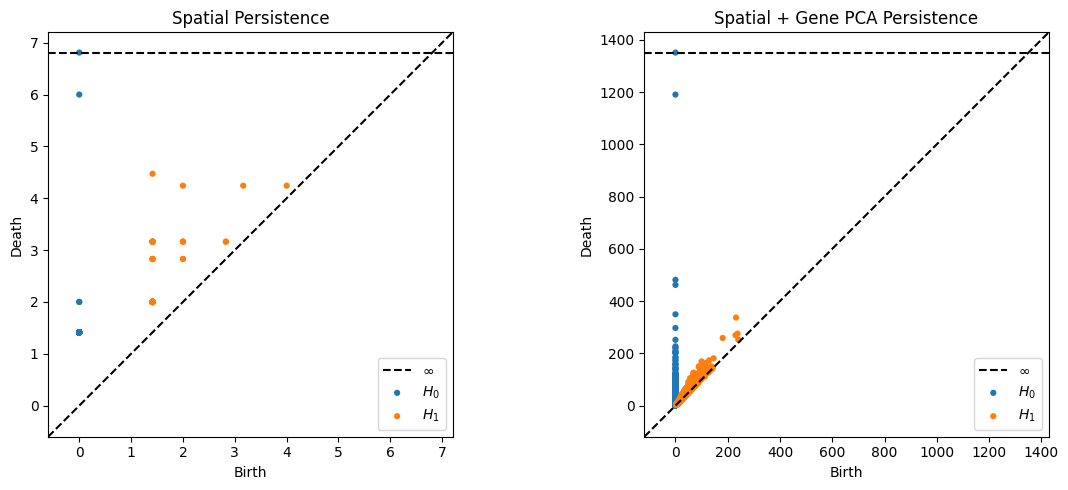

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
from sklearn.decomposition import PCA

points = xy_coords_array
gene_expr = top_variance_genes_array

spatial_coords = points

# print types
print("Points type:", type(points))
print("Gene expression type:", type(gene_expr))


# spatial_coords = np.concatenate(points, axis=0)
# gene_expr = np.concatenate(gene_expr, axis=0)

# Step 2: PCA on gene expression
pca = PCA(n_components=2)
gene_pca = pca.fit_transform(gene_expr)

# Step 3: Combine spatial and gene PCA data
combined_data = np.hstack([spatial_coords, gene_pca])

# Step 4: Persistent homology
result_spatial = ripser(spatial_coords)
result_combined = ripser(combined_data)

# Step 5: Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].set_title("Spatial Persistence")
plot_diagrams(result_spatial["dgms"], show=False, ax=axs[0])

axs[1].set_title("Spatial + Gene PCA Persistence")
plot_diagrams(result_combined["dgms"], show=False, ax=axs[1])

plt.tight_layout()
plt.show()

In [103]:
# convert a list of points to 2 lists of x and y coordinates
x_coords = [point[0] for point in result_combined["dgms"][1]]
y_coords = [point[1] for point in result_combined["dgms"][1]]
coords = np.array([x_coords, y_coords]).T
coords

array([[240.46665955, 252.90260315],
       [237.50904846, 275.3956604 ],
       [231.78190613, 336.89654541],
       ...,
       [  3.32719207,   4.14522839],
       [  3.32201123,   4.26260757],
       [  3.09574628,   3.6277442 ]])

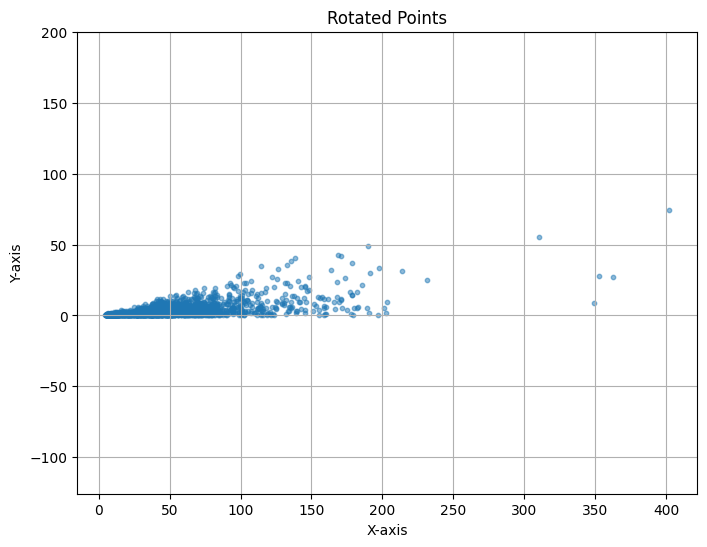

In [104]:
#rotate the points by 45 degrees clockwise
def rotate_points(points, angle_degrees):
    angle_radians = np.radians(angle_degrees)
    rotation_matrix = np.array([[np.cos(angle_radians), -np.sin(angle_radians)],
                                 [np.sin(angle_radians), np.cos(angle_radians)]])
    return points @ rotation_matrix.T
rotated_points = rotate_points(coords, -45)  # Rotate by -45 degrees


# Plot the rotated points
plt.figure(figsize=(8, 6))
plt.scatter(rotated_points[:, 0], rotated_points[:, 1], s=10, alpha=0.5)
plt.title('Rotated Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.axis('equal')
plt.show()

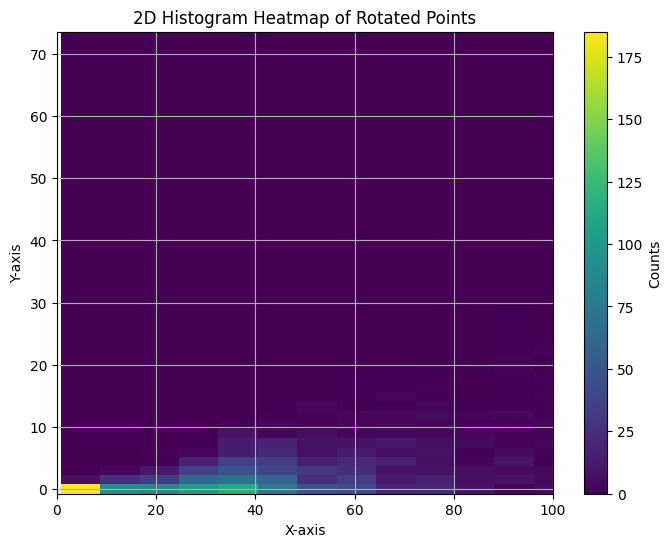

In [105]:
# convert to discrete heat map
import matplotlib.pyplot as plt
import numpy as np

# Create a 2D histogram (heatmap) of the rotated points
heatmap, xedges, yedges = np.histogram2d(rotated_points[:, 0], rotated_points[:, 1], bins=50)
# Create a meshgrid for the heatmap
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Y, heatmap.T, shading='auto', cmap='viridis')
plt.colorbar(label='Counts')
plt.title('2D Histogram Heatmap of Rotated Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# set yaxis to 0 - 30
# plt.gca().set_ylim(bottom=0, top=30)
# set xaxis to 0 - 100
plt.gca().set_xlim(left=0, right=100)
plt.grid()
plt.show()

In [106]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import kmapper as km

# Step 1: Generate synthetic X10-like gene expression data
# Simulate 3 clusters of cells in 50-dimensional gene space
test = top_variance_genes_df.reset_index(drop=True)
X = StandardScaler().fit_transform(test.values)

# Convert to DataFrame (simulate genes as columns)
gene_names = [f"Gene_{i}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=gene_names)

# Step 2: Initialize KeplerMapper
mapper = km.KeplerMapper(verbose=1)

# Step 3: Use PCA as lens
lens = mapper.fit_transform(df, projection=PCA(n_components=2))

# Step 4: Create a Mapper graph
graph = mapper.map(
    lens,
    df.values,
    clusterer=DBSCAN(eps=5.0, min_samples=3),
    cover=km.Cover(n_cubes=50, perc_overlap=0.5)
)

# Step 5: Visualize (save HTML)
html_path = "mapper_x10_synthetic_copy.html"
mapper.visualize(
    graph,
    path_html=html_path,
    title="Mapper on Synthetic X10 Genomic Data"
)

html_path  # Return path to HTML file


KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: PCA(n_components=2)
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (4263, 100)

..Projecting data using: 
	PCA(n_components=2)


..Scaling with: MinMaxScaler()

Mapping on data shaped (4263, 100) using lens shaped (4263, 2)

Creating 2500 hypercubes.

Created 1028 edges and 322 nodes in 0:00:10.305515.
Wrote visualization to: mapper_x10_synthetic_copy.html


'mapper_x10_synthetic_copy.html'